# Notebook 4: Exploring Bivariate Relationships 

In previous notebooks, we learned how to explore our variables, recode categorical variables into dummies, and clean and/or classify our numeric variables.

In today's lab, we're going to focus on

> Exploring relationships between two variables

## 1.0 Reading in our libraries, our dataset, and renaming our variables

Just the intro material!  Remember, you need to run all the cells in order - libraries, read data, and rename data, otherwise Python will give you an error message!  Note that there is a new datafile that includes the RAKEDW0 variable - this is our weight variable.

In [2]:
# First, We're going to call in our libraries

import numpy as np
import pandas as pd
import math
from scipy import stats
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import scipy 
from datascience import *

pd.options.display.float_format = '{:.2f}'.format

In [3]:
#Show our plots in the Jupyter notebook
%matplotlib inline

In [4]:
#When we start working with nan (missing) values, we can get warnings - we're going to ignore them here
import warnings
warnings.filterwarnings("ignore") 

In [5]:
#Now we're going to read in our data

# Here is my code for reading in the complete CHIS data 2

# col_list = ['AC47', 'AC42', 'SRSEX', 'AC46', 'POVLL', 'AE_VEGI', 'OMBSRR_P1','POVGWD_P1','RAKEDW0']
#chis_df=pd.read_csv("CHIS_2018_Adult_All.csv", usecols=col_list)
#chis_df

#today we're going to work with the extract as we did last week

chis_df = pd.read_csv('chis_extract_2018_weights.csv')
chis_df

,AC47,AC42,SRSEX,AC46,POVLL,AE_VEGI,OMBSRR_P1,POVGWD_P1,RAKEDW0
0,2,4,2,0,4,7,2,5.00,85.88
1,0,4,1,0,4,7,2,5.00,1911.82
2,3,4,2,0,4,3,2,5.00,197.04
3,3,4,2,120,4,7,2,4.12,1335.06
4,6,4,1,0,1,14,2,0.15,938.31
...,...,...,...,...,...,...,...,...,...
21172,2,4,2,0,1,4,2,0.00,1601.03
21173,6,4,1,5,3,4,1,2.35,8935.30
21174,2,4,1,60,1,21,1,1.10,1454.76
21175,0,4,1,22,4,7,5,5.00,3184.64


In [6]:
chis_df.rename(columns={'AC47':'drank_water', 
                        'AC42':'nhood_fv', 
                        'AE_VEGI':'ate_fv',
                        'SRSEX': 'sex',
                        'AC46': 'drank_sweet',
                        'OMBSRR_P1': 'race_ethnicity',
                        'POVGWD_P1' : 'pov_ratio',
                       'POVLL' : 'pov_cat',
                       'RAKEDW0': 'weight'}, inplace=True)
chis_df

,drank_water,nhood_fv,sex,drank_sweet,pov_cat,ate_fv,race_ethnicity,pov_ratio,weight
0,2,4,2,0,4,7,2,5.00,85.88
1,0,4,1,0,4,7,2,5.00,1911.82
2,3,4,2,0,4,3,2,5.00,197.04
3,3,4,2,120,4,7,2,4.12,1335.06
4,6,4,1,0,1,14,2,0.15,938.31
...,...,...,...,...,...,...,...,...,...
21172,2,4,2,0,1,4,2,0.00,1601.03
21173,6,4,1,5,3,4,1,2.35,8935.30
21174,2,4,1,60,1,21,1,1.10,1454.76
21175,0,4,1,22,4,7,5,5.00,3184.64


### Codebook

> AC46: Number of times respondent drank sweet fruit drinks in past month

> AC47: Number of times respondent drank water yesterday

> AE_VEGI: Number of times respondent eats vegetables per week

> AC42: Number of times respondent was able to find fresh fruits/vegetables in neighborhood
(1=Never, 2=Sometimes, 3 = Usually, 4 = Always, 5=Doesn't eat f/v, 6: Doesn't shop for f/v, 7 Doesn't shop in neighborhood)

> SRSEX: Self-reported Sex (1= Male, 2=Female)

> OMBSRR_P1: Race/ethnicity
(1=Hispanic, 2= White NH, 3=Black NH, 4=AmIndian/Alaska Native NH, 5=Asian NH, 6=Other or two or more)

> POVLL: poverty level
(1 = 0-99% FPL, 2=100-199% FPL, 3=200-299% FPL, 4=300% FPL and above)

> POVGWD_P1: Family Poverty Threshold Level

> RAKEDW0: Individual weight

##  2.0  Exploring Bivariate Relationships

### 2.1 Hypothesis

Let's start by reminding ourselves why we're doing all this data cleaning!  I am a city planner interested in the issue of soda taxes.   I am concerned that people in poverty will disporportionately bear the burden of a soda tax.  

**My hypothesis is that people who are poor are more likely to drink sweet fruit drinks/sodas, so this is a regressive tax.**

>  Y Variable: Number of Sodas/Sweet Drinks (AC46 - renamed drank_sweet)

>  X Variable: Ratio of income to poverty line  (POVGWD_P1  - renamed pov_ratio)

>  Alternate X Variable: Categorical poverty level (POVLL - renamed pov_cat)

Below, I've included the code I used to clean each of the variables, including notes about what I did and why!

**I'm also going to create a "text" race/ethnicity variable to explore if there might be differences by race/ethnicity.  This is mostly to show you another option for working with your data in Python!**


### 2.2  Cleaning my variables

#### 2.2a Clean my Y variable (numeric)

In [8]:
#Describe the distribution of my data
chis_df['drank_sweet'].describe()

count   21177.00
mean        7.46
std        17.28
min         0.00
25%         0.00
50%         0.00
75%         8.00
max       300.00
Name: drank_sweet, dtype: float64

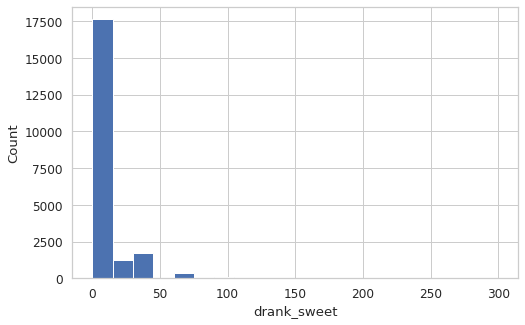

In [9]:
#Look at it visually with a histogram - clear there's lots of 0's, and 300 is a clear outlier
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    chis_df['drank_sweet'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='drank_sweet', ylabel='Count');

In [11]:
#drop observations 3 StDev from the mean for the "drank_sweet" variable
chis_df=chis_df[(np.abs(stats.zscore(chis_df['drank_sweet'], nan_policy='omit'))<3)]
chis_df.describe()

,drank_water,nhood_fv,sex,drank_sweet,pov_cat,ate_fv,race_ethnicity,pov_ratio,weight
count,20536.00,20536.00,20536.00,20536.00,20536.00,20536.00,20536.00,20536.00,20536.00
mean,6.60,3.70,1.54,5.16,3.11,7.14,2.26,3.14,1395.32
std,9.91,0.79,0.50,9.04,1.12,6.52,1.26,1.75,2101.65
min,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,8.60
25%,3.00,4.00,1.00,0.00,2.00,3.00,2.00,1.48,213.70
50%,5.00,4.00,2.00,0.00,4.00,7.00,2.00,3.34,625.91
75%,8.00,4.00,2.00,5.00,4.00,7.00,2.00,5.00,1658.40
max,99.00,7.00,2.00,31.00,4.00,139.00,6.00,5.00,19342.80


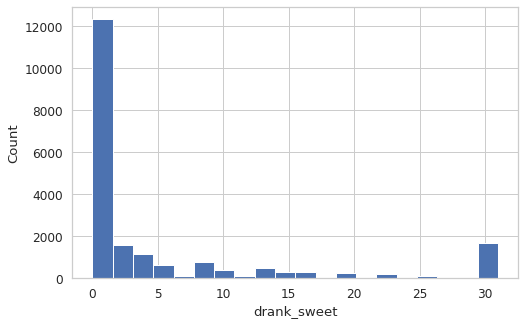

In [13]:
#Check distribution again - looks better! 
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    chis_df['drank_sweet'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='drank_sweet', ylabel='Count');

#### 2.2b  Clean my X variable (poverty as a ratio)

In [14]:
chis_df['pov_ratio'].describe()

count   20536.00
mean        3.14
std         1.75
min         0.00
25%         1.48
50%         3.34
75%         5.00
max         5.00
Name: pov_ratio, dtype: float64

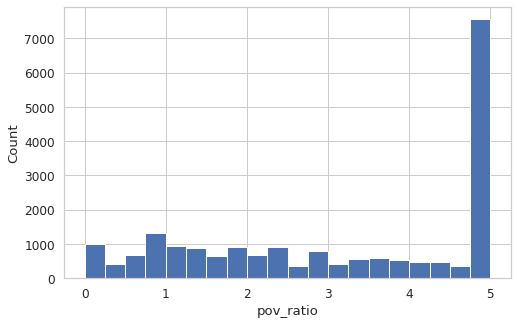

In [15]:
#Look at it visually with a histogram - this looks pretty good so I'm going to leave it as is
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    chis_df['pov_ratio'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='pov_ratio', ylabel='Count');

#### 2.2c Clean my X variable (poverty as category)

In [16]:
# Look at the distribution of values
pd.crosstab(chis_df['pov_cat'], columns='Total')

col_0,Total
pov_cat,
1,2763
2,3563
3,2829
4,11381


In [17]:
#Because I am most concerned about households living under the poverty line, 
#I'm going to create a dummy where 1 = under the poverty line, and 0 is above

chis_df['inpoverty_dv']=chis_df['pov_cat'].map({1:1, 2:0, 3:0, 4:0})
pd.crosstab(chis_df['inpoverty_dv'], columns='Total')

col_0,Total
inpoverty_dv,
0,17773
1,2763


In [ ]:
# Remember that it's good to double check when creating new variables

In [14]:
chis_df

,drank_water,nhood_fv,sex,drank_sweet,pov_cat,ate_fv,race_ethnicity,pov_ratio,weight,inpoverty_dv
0,2,4,2,0,4,7,2,5.00,85.88,0
1,0,4,1,0,4,7,2,5.00,1911.82,0
2,3,4,2,0,4,3,2,5.00,197.04,0
4,6,4,1,0,1,14,2,0.15,938.31,1
5,4,4,1,0,4,2,2,3.04,460.40,0
...,...,...,...,...,...,...,...,...,...,...
21171,4,4,2,4,4,7,2,5.00,1022.38,0
21172,2,4,2,0,1,4,2,0.00,1601.03,1
21173,6,4,1,5,3,4,1,2.35,8935.30,0
21175,0,4,1,22,4,7,5,5.00,3184.64,0


#### Sometimes, I want a categorical variable with text so I can quickly look at my data - here's one way to create a new categorical variable with the values replaced by text strings.

In [19]:
#This code creates a new column with a categorical race variable based on the dummies
#OMBSRR_P1: Race/ethnicity (1=Hispanic, 2= White NH, 3=Black NH, 4=AmIndian/Alaska Native NH, 5=Asian NH, 6=Other or two or more)
chis_df.loc[(chis_df['race_ethnicity'] == 2), 'race_eth_text'] = 'NHWhite'  
chis_df.loc[(chis_df['race_ethnicity']==5), 'race_eth_text'] = "Asian"
chis_df.loc[(chis_df['race_ethnicity']==3), 'race_eth_text'] = "Black"
chis_df.loc[(chis_df['race_ethnicity']==1), 'race_eth_text'] = "Hispanic"
chis_df.loc[(chis_df['race_ethnicity']==4), 'race_eth_text'] = "Other/Two Races"
chis_df.loc[(chis_df['race_ethnicity']==6), 'race_eth_text'] = "Other/Two Races"
chis_df['race_eth_text'].value_counts()

NHWhite            12097
Hispanic            4532
Asian               1809
Black               1095
Other/Two Races     1003
Name: race_eth_text, dtype: int64

### 2.3  Exploring relationships

Now that I've cleaned my data, I can start to explore whether or not there are relationships between my Y and X variables.  I'm going to explore whether there are any observable differences in the average number of sweet drinks a person consumes by my poverty variables.  

In [20]:
#First, I'm going to look at my original pov_cat variable
chis_df["drank_sweet"].groupby(chis_df["pov_cat"]).mean()

pov_cat
1   6.56
2   6.47
3   5.63
4   4.29
Name: drank_sweet, dtype: float64

In [21]:
#If I want to look at different metrics, like median, min or max, I can do that too
chis_df["drank_sweet"].groupby(chis_df["pov_cat"]).agg(['mean', 'median', 'min', 'max'])

,mean,median,min,max
pov_cat,,,,
1,6.56,1,0,31
2,6.47,0,0,31
3,5.63,0,0,30
4,4.29,0,0,31


In [23]:
#How about when I look at my newly created dummy variable:
#Now that I've looked at my data, should I reconsider how I created my dummy?
chis_df["drank_sweet"].groupby(chis_df["inpoverty_dv"]).agg(['mean', 'median'])

,mean,median
inpoverty_dv,,
0,4.94,0
1,6.56,1


In [24]:
#I can also explore by race/ethnicity - here's where the "text" version benefits me - 
#I don't have to remember what the number values stand for
chis_df["drank_sweet"].groupby(chis_df["race_eth_text"]).mean()

race_eth_text
Asian             4.34
Black             7.03
Hispanic          7.37
NHWhite           4.25
Other/Two Races   5.56
Name: drank_sweet, dtype: float64

In [32]:
#Here's another approach to exploring the relationship between two categorical variables.  
#Take a minute to explore what the normalize code did.  What does it mean when you change it to index?  all?
pd.crosstab(index=chis_df["race_eth_text"], columns=chis_df["inpoverty_dv"], margins=True, normalize='columns')


inpoverty_dv,0,1,All
race_eth_text,,,
Asian,0.08,0.12,0.09
Black,0.05,0.07,0.05
Hispanic,0.20,0.37,0.22
NHWhite,0.62,0.38,0.59
Other/Two Races,0.05,0.06,0.05


Text(0, 0.5, 'Drank Sweet/Soda Drinks')

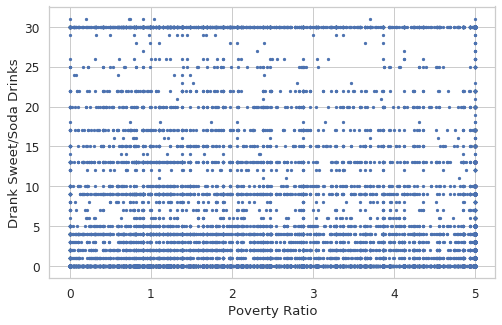

In [34]:
# Exploring the relationship between the poverty ratio and sweet drinks is generally done with a scatterplot
# Because both are numeric, there are too many values to use "groupby"
plt.scatter(chis_df["pov_ratio"], chis_df["drank_sweet"], s=5)
plt.xlabel("Poverty Ratio")
plt.ylabel("Drank Sweet/Soda Drinks")

#it's still pretty hard to assess, right? It's because we have so many observations
#and because there are a lot of people who drink soda!
#That's why we'll calculate correlations later on!

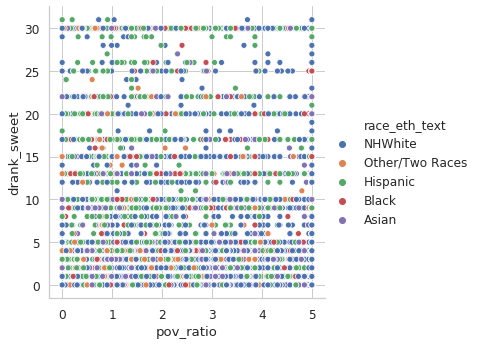

In [35]:
#another fun way to visualize!!
sns.relplot(x="pov_ratio", y="drank_sweet", hue="race_eth_text", data=chis_df);

## 3 Survey Weights 

When official agencies run a survey (like CHIS, PUMS, AHS, and NHTS), they often include weights that allow the user to calculate total population estimates from survey responses to reduce survey bias. Simply, weighting assists in making our sample of survey respondents (more) representative of the population.  The weighting process usually involves three steps: (i) obtain the design weights, which account for sample selection; (ii) adjust these weights to compensate for nonresponse; (iii) adjust the weights so that the estimates coincide to some known totals of the population, which is called calibration.

The literature on weighting is vast, and for those of you who are going to move on to more advanced statistical techniques, you will learn a lot more about weighting than I can do justice here.  But, it is useful to explore how using weights in descriptive statistics can change your results.

Statistical packages tend to have sophisticated functions to apply weights - I wasn't able to find similarly elegant solutions for Python.  But below are two approaches if you'd like to try using weights in your descriptive results.

**3.1. Weighting: First Approach for Means and Total Counts**

The cell below is a set of code where I define two separate "helper" functions.  The first is to calculate a weighted mean, the second is to create a weighted sum.  You run this cell, and then you use the **w_mean** and **w_sum** functions in subsequent cells to specify the output you want.  

In [36]:
# Sample weights helper function for weighted mean.
def w_mean(frame, mean_var, weight):  #this line of code defines the function w_mean, as having to specify a data frame, a variable, and a weight
    d = frame[mean_var]
    w = frame[weight]
    try: 
        return (d * w).sum() / w.sum() #this calculates the weighted mean
    except ZeroDivisionError:
        return np.nan

# Sample weights helper function for weighted sum.
def w_sum(frame, sum_var, weight):
    d = frame[sum_var]
    w = frame[weight]
    try: 
        return (d * w).sum()
    except ZeroDivisionError:
        return np.nan

In [37]:
#Let's first take a look at the distribution of sweet drinks by race/ethnicity without weights
chis_df["drank_sweet"].groupby(chis_df["race_eth_text"]).mean()

race_eth_text
Asian             4.34
Black             7.03
Hispanic          7.37
NHWhite           4.25
Other/Two Races   5.56
Name: drank_sweet, dtype: float64

In [38]:
# Now, with weights - what happens to the mean number of sweet drinks by race/ethnicity?
chis_df.groupby('race_eth_text').apply(w_mean, 'drank_sweet', 'weight')

race_eth_text
Asian             5.12
Black             8.21
Hispanic          7.70
NHWhite           4.56
Other/Two Races   6.57
dtype: float64

In [39]:
#Again, let's first look at the number of respondents who are under the poverty line
chis_df['inpoverty_dv'].value_counts()

0    17773
1     2763
Name: inpoverty_dv, dtype: int64

In [40]:
#now, with weights
w_sum(chis_df, 'inpoverty_dv', 'weight')

4391826.569549672

In [41]:
#The number of respondents by race/ethnicity who are under the poverty line without weights
chis_df["inpoverty_dv"].groupby(chis_df["race_eth_text"]).agg(['sum'])

,sum
race_eth_text,
Asian,331
Black,198
Hispanic,1010
NHWhite,1046
Other/Two Races,178


In [42]:
# Weighted counts of the number of people under the poverty line by race/ethnicity
chis_df.groupby('race_eth_text').apply(w_sum, 'inpoverty_dv', 'weight')

race_eth_text
Asian              679043.41
Black              292962.18
Hispanic          2393593.40
NHWhite            934230.28
Other/Two Races     91997.30
dtype: float64

**3.2. Weighting: Approach 2 - use weightedcalcs library**

I found this cool library that does weighted calculations for you on github.  The example python notebook can be found here:
https://github.com/jsvine/weightedcalcs/tree/master/examples/notebooks .  This also provides an example of how you have to sometimes install a new library, even in datahub.  The command is pip install --user and then the name of the library

In [43]:
pip install --user weightedcalcs

Note: you may need to restart the kernel to use updated packages.


In [44]:
import weightedcalcs as wc

In [45]:
#this line of code assigns which variable will be the "weight" variable in the calculator
calc = wc.Calculator("weight")

In [46]:
chis_df['drank_sweet'].describe()

count   20536.00
mean        5.16
std         9.04
min         0.00
25%         0.00
50%         0.00
75%         5.00
max        31.00
Name: drank_sweet, dtype: float64

In [47]:
#here I caclulate the weighted mean number of drinks
calc.mean(chis_df, "drank_sweet").round()

6.0

In [48]:
#without weights
pd.crosstab(chis_df['inpoverty_dv'], columns='Total', normalize=True)

col_0,Total
inpoverty_dv,
0,0.87
1,0.13


In [49]:
#with weights
calc.distribution(chis_df, "inpoverty_dv").round(3).sort_values(ascending=False)

inpoverty_dv
0   0.85
1   0.15
Name: weight, dtype: float64

In [50]:
#if you want to calculate statistics across a groupby variable, you need to create a new object
grp_race_eth= chis_df.groupby(["race_eth_text"])

In [51]:
calc.mean(grp_race_eth, "drank_sweet")

race_eth_text
Asian             5.12
Black             8.21
Hispanic          7.70
NHWhite           4.56
Other/Two Races   6.57
dtype: float64

## 4  Conclusion

If you don't feel like you want to apply weights, just be clear that the N in your table and any descriptive statistics are based on the sample data, and not the population.  As with everything, as long as you document your choices, you'll be using data ethically!